# Kinematic coverage

In [1]:
%reset -f

import ROOT

ROOT.gStyle.SetOptFit(1)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetGridColor(16)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)
ROOT.gStyle.SetPadRightMargin(0)
ROOT.gStyle.SetPadBottomMargin(0.13)
ROOT.gStyle.SetPadLeftMargin(0.07)
ROOT.gStyle.SetTitleOffset(0.7, 'Y')
ROOT.gStyle.SetTitleSize(0.09,'T')
ROOT.gStyle.SetTitleSize(0.065,'xy')
ROOT.gStyle.SetLabelSize(0.055,'xy')

ROOT.TH1.AddDirectory(0)

%run -i eppi0_columns.py
%run -i eppi0_binning_scheme_v3.py

rdfs = []
for fname in ['data/lvl2_eppi0.inb.qa.ecorr.pcorr.root','data/lvl2_eppi0.inb.qa.root','data/lvl2_eppi0.outb.qa.ecorr.pcorr.root','data/lvl2_eppi0.outb.qa.root']:
    df = ROOT.RDataFrame("h22", fname)
    df = define_eppi0_columns_using_proton(df)
    df = define_eppi0_bins(df, fname)
    df = process_eppi0_bins(df, fname)
    #df = df.Filter("abs(dpx)<0.3 && abs(dpy)<0.3 && abs(dphi)<4 && dpz>-0.5 && dpz<0.9")
    df = df.Filter("abs(dpt)<0.3 && abs(dphi)<4 && dpz>-0.5 && dpz<0.9 && mm2>-0.3 && mm2<0.4")
    df = df.Filter("&&".join(f"(((int)status)&(1<<{i}))" for i in [ecloose,gloosest,prodc]))
    df = df.Filter("thp<44.106+-6.625*pp+1.438*pp*pp")
    
    df = df.Define("pg", "array<double,2>{pg1,pg2}")
    df = df.Define("thg", "array<double,2>{thg1,thg2}")
    df = df.Define("fig", "array<double,2>{fig1,fig2}")

    rdfs.append(df)

Welcome to JupyROOT 6.26/00


In [2]:
hqs = [df.Histo1D(("hQ2","Q^{2};Q^{2} [GeV^{2}]",300,0,10), "q2") for df in rdfs]
hxs = [df.Histo1D(("hxB","x_{B};x_{B}",300,0,0.8), "xb") for df in rdfs]
hts = [df.Histo1D(("hmt","-t;-t [GeV^{2}]",300,0,2), "tt") for df in rdfs]
hfis = [df.Histo1D(("hphistar","#phi^{*};#phi^{*} [#circ]",300,0,360),"phistar") for df in rdfs]


### Kinematic variables

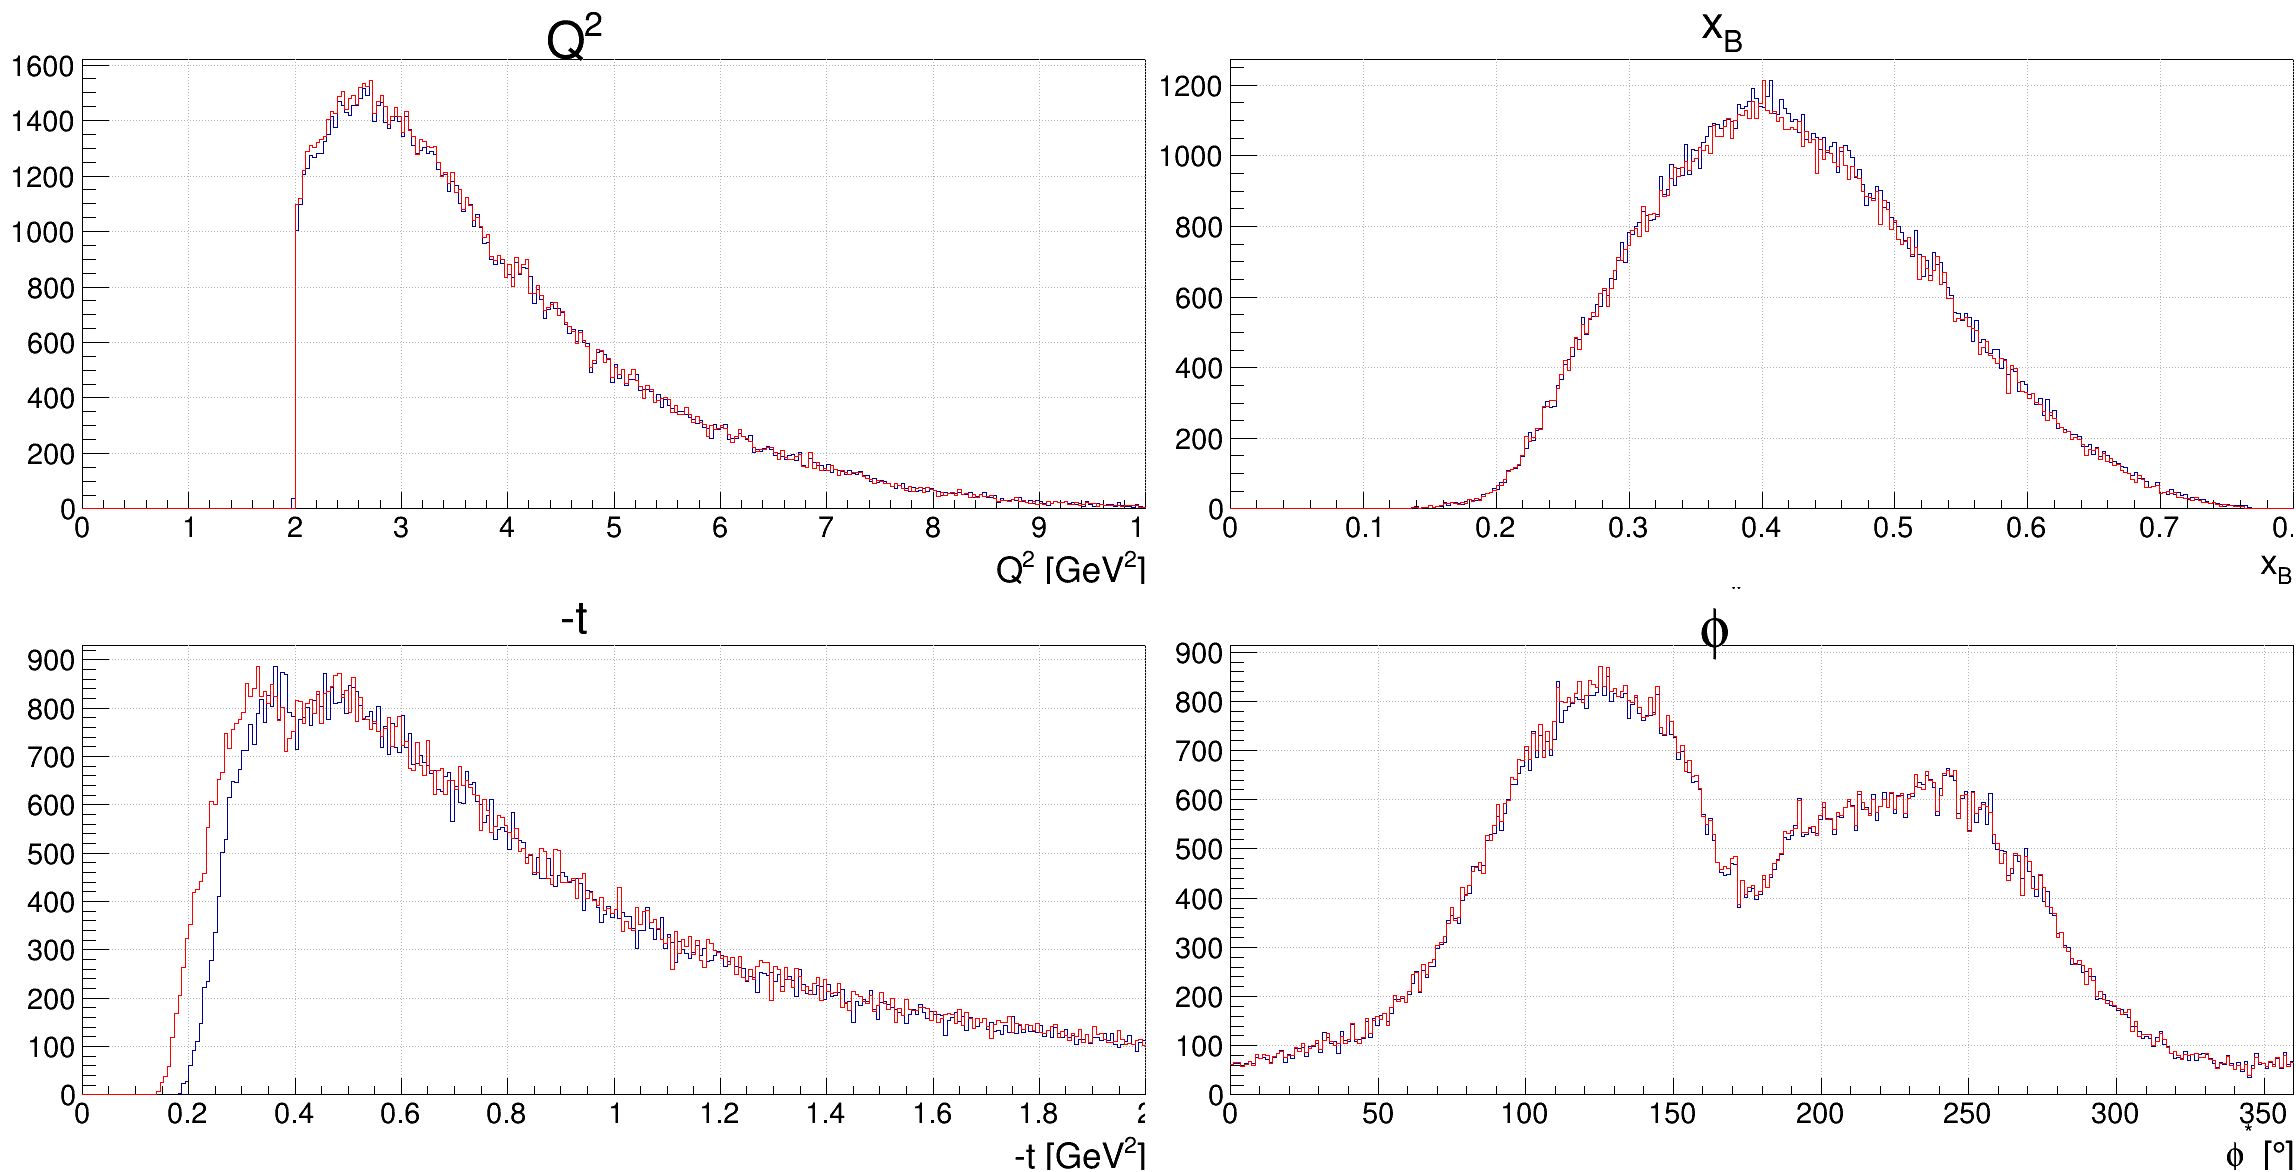

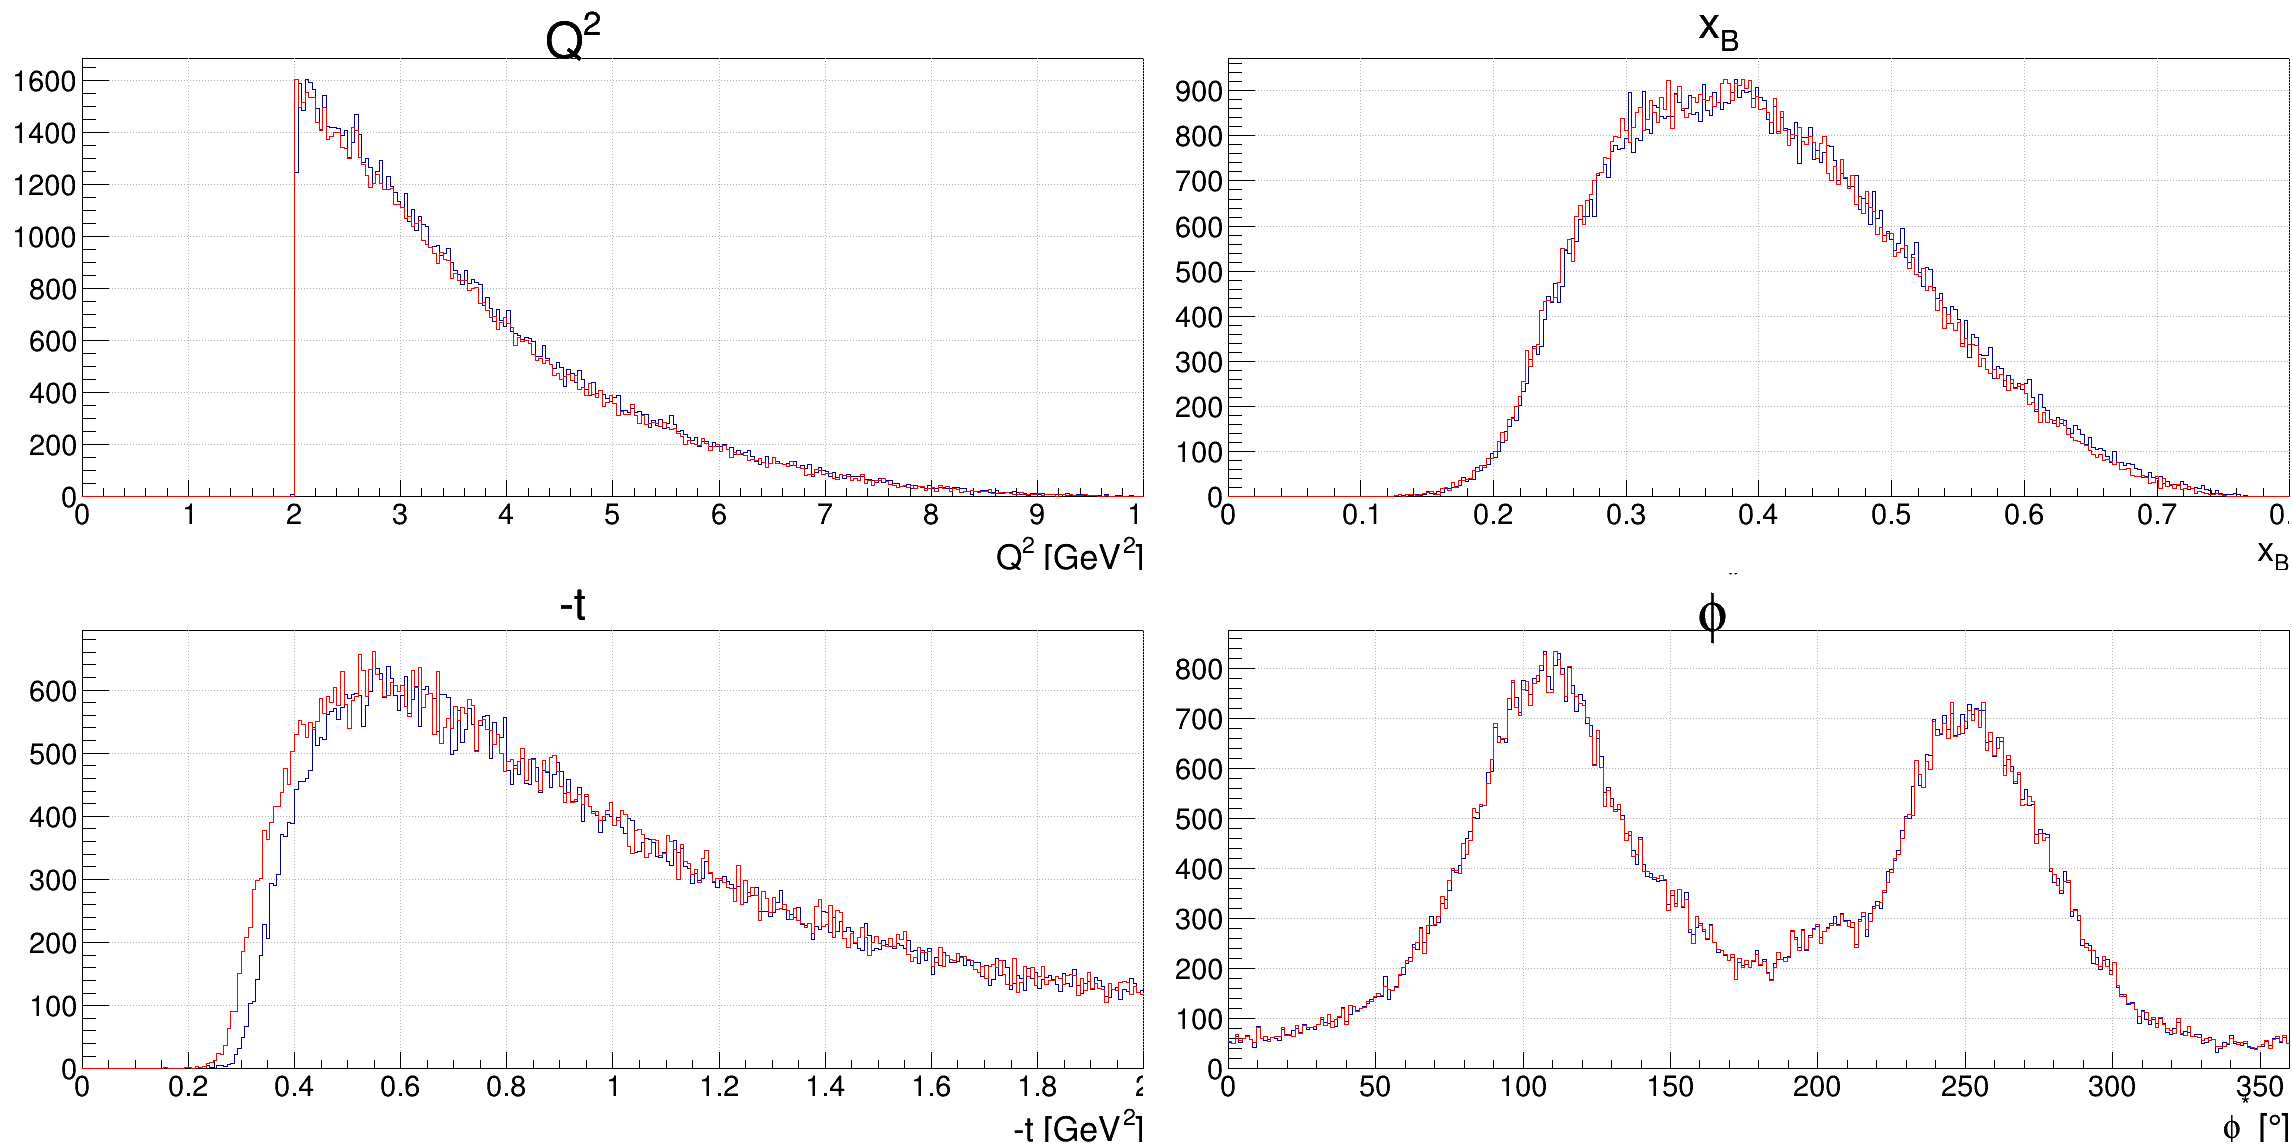

In [3]:
c1 = ROOT.TCanvas("c0","c0",2300,1200)
c1.SetTopMargin(0)
c1.SetRightMargin(0)
c1.Divide(2,2,0.001,0.001)
c1.Draw()

ipad = 0
for h1,h2 in [hqs[:2],hxs[:2],hts[:2],hfis[:2]]:
    ipad+=1
    c1.cd(ipad)
    h1.Draw()
    h2 = h1.mc = h2.Clone()
    scale = h2.GetMaximum()/h1.GetMaximum()
    h2.Scale(1/scale)
    h2.Draw("same hist")
    h2.SetLineColor(2)

c1.Print("pdf/MC_comparison.kinematics.inb.pdf")

#_____________________________________________________________________________________

c2 = c1.DrawClone()

ipad = 0
for h1,h2 in [hqs[2:],hxs[2:],hts[2:],hfis[2:]]:
    ipad+=1
    c2.cd(ipad)
    h1.Draw()
    h2 = h1.mc = h2.Clone()
    scale = h2.GetMaximum()/h1.GetMaximum()
    h2.Scale(1/scale)
    h2.Draw("same hist")
    h2.SetLineColor(2)

c1.Print("pdf/MC_comparison.kinematics.outb.pdf")

____________________________________
____________________________________
____________________________________